In [163]:
import mne

ruta_pre1 = r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 1\Pre\sub-01_ses-pre_task-rest_eeg.vhdr"
ruta_post1 = r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 1\Post\sub-01_ses-post_task-rest_eeg.vhdr"
ruta_pre2=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 5\pre\sub-05_ses-pre_task-rest_eeg.vhdr"
ruta_post2=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 5\post\sub-05_ses-post_task-rest_eeg.vhdr"
ruta_pre3=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 7\pre\sub-07_ses-pre_task-rest_eeg.vhdr"
ruta_post3=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 7\post\sub-07_ses-post_task-rest_eeg.vhdr"
ruta_pre4=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 10\pre\sub-10_ses-pre_task-rest_eeg.vhdr"
ruta_post4=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 10\post\sub-10_ses-post_task-rest_eeg.vhdr"
ruta_pre5=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 15\pre\sub-15_ses-pre_task-rest_eeg.vhdr"
ruta_post5=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 15\post\sub-15_ses-post_task-rest_eeg.vhdr"
ruta_pre6=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 16\pre\sub-16_ses-pre_task-rest_eeg.vhdr"
ruta_post6=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 16\post\sub-16_ses-post_task-rest_eeg.vhdr"
ruta_pre7=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 19\pre\sub-19_ses-pre_task-rest_eeg.vhdr"
ruta_post7=r"C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 19\post\sub-19_ses-post_task-rest_eeg.vhdr"





In [164]:
##para cargar archivo BRAINVISION 
def cargar_brainvision(ruta_pre, ruta_post):
     with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        raw_pre = mne.io.read_raw_brainvision(ruta_pre, preload=True)
        raw_post = mne.io.read_raw_brainvision(ruta_post, preload=True)
        return raw_pre, raw_post


raw_pre1, raw_post1 = cargar_brainvision(ruta_pre1, ruta_post1) ## eliminado
raw_pre2, raw_post2 = cargar_brainvision(ruta_pre2, ruta_post2)
raw_pre3, raw_post3 = cargar_brainvision(ruta_pre3, ruta_post3)
raw_pre4, raw_post4 = cargar_brainvision(ruta_pre4, ruta_post4)
raw_pre5, raw_post5 = cargar_brainvision(ruta_pre5, ruta_post5)
raw_pre6, raw_post6 = cargar_brainvision(ruta_pre6, ruta_post6)
raw_pre7, raw_post7 = cargar_brainvision(ruta_pre7, ruta_post7)

Extracting parameters from C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 1\Pre\sub-01_ses-pre_task-rest_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 270819  =      0.000 ...   541.638 secs...
Extracting parameters from C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 1\Post\sub-01_ses-post_task-rest_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 271089  =      0.000 ...   542.178 secs...
Extracting parameters from C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 5\pre\sub-05_ses-pre_task-rest_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 270939  =      0.000 ...   541.878 secs...
Extracting parameters from C:\Users\Ana\Desktop\5to semestre\Modelos Computacionales\Neurociencias-2026-1\S03_datasets\proyecto\paciente 5\post\sub-05_ses-post_task-rest_eeg.vhdr...
Set

In [219]:
import numpy as np
import mne
from autoreject import AutoReject
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from mi_modulo import *

ModuleNotFoundError: No module named 'mi_modulo'

In [173]:
import numpy as np

def detectar_canales_malos_por_varianza(raw, factor=3.0):
    """
    Detecta canales malos usando varianza (outliers).
    factor: número de desviaciones estándar para marcar un outlier.
    """

    data = raw.get_data()
    var = np.var(data, axis=1)
    
    mean = np.mean(var)
    std  = np.std(var)

    umbral_alto = mean + factor * std
    umbral_bajo = mean - factor * std

    idx_malos = np.where((var > umbral_alto) | (var < umbral_bajo))[0]
    nombres_malos = [raw.ch_names[i] for i in idx_malos]

    return nombres_malos, var



In [174]:

raw_pre_list  = [raw_pre1, raw_pre2, raw_pre3, raw_pre4, raw_pre5, raw_pre6, raw_pre7]
raw_post_list = [raw_post1, raw_post2, raw_post3, raw_post4, raw_post5, raw_post6, raw_post7]

for i in range(7):
    print(f"\n - Sujeto {i+1} PRE-")
    malos_pre, var_pre = detectar_canales_malos_por_varianza(raw_pre_list[i])
    print("Canales malos (por varianza):", malos_pre)
    inspeccionar_eeg(raw_pre_list[i], title=f"PRE Sujeto {i+1}")

    print(f"\n - Sujeto {i+1} POST-")
    malos_post, var_post = detectar_canales_malos_por_varianza(raw_post_list[i])
    print("Canales malos (por varianza):", malos_post)
    inspeccionar_eeg(raw_post_list[i], title=f"POST Sujeto {i+1}")




===== Sujeto 1 PRE =====
Canales malos (por varianza): []
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)


===== Sujeto 1 POST =====
Canales malos (por varianza): []
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lo

In [183]:
## Interpolar = reconstruir un canal malo usando los canales vecinos
raw_pre4.info['bads'] = ['P8']      # Sujeto 4 PRE
raw_pre4.interpolate_bads()

raw_post5.info['bads'] = ['FT9']     # Sujeto 5 POST
raw_post5.interpolate_bads()


## Si pocos o ningún canal aparece como malo y no hay picos gigantes:
#### eso indica que tu EEG está relativamente estable
##Muchos canales malos → ICA recomendado. 

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 30 sensor positions
Interpolating 1 sensors


<RawBrainVision | sub-15_ses-post_task-rest_eeg.eeg, 31 x 270750 (541.5 s), ~64.1 MiB, data loaded>

In [188]:
## separar para pre y post las sesiones de ojos abiertos y ojos cerrados
## + concatenar los de ojos cerrado
def obtener_cerrados(raw_pre, raw_post, dur_bloque=135):
   
    # PRE
    pre_C1 = raw_pre.copy().crop(tmin=dur_bloque, tmax=2*dur_bloque)
    pre_C2 = raw_pre.copy().crop(tmin=3*dur_bloque, tmax=4*dur_bloque)

    # POST
    post_C1 = raw_post.copy().crop(tmin=dur_bloque, tmax=2*dur_bloque)
    post_C2 = raw_post.copy().crop(tmin=3*dur_bloque, tmax=4*dur_bloque)

    # ojos cerrado
    pre_cerrado = mne.concatenate_raws([pre_C1, pre_C2])
    post_cerrado = mne.concatenate_raws([post_C1, post_C2])

    # matrices
    data_pre = pre_cerrado.get_data()
    data_post = post_cerrado.get_data()

    return data_pre,data_post


data_pre1, data_post1 = obtener_cerrados(raw_pre1, raw_post1)
data_pre2, data_post2 = obtener_cerrados(raw_pre2, raw_post2)
data_pre3, data_post3 = obtener_cerrados(raw_pre3, raw_post3)
data_pre4, data_post4= obtener_cerrados(raw_pre4, raw_post4)
data_pre5, data_post5= obtener_cerrados(raw_pre5, raw_post5)
data_pre6, data_post6= obtener_cerrados(raw_pre6, raw_post6)
data_pre7, data_post7= obtener_cerrados(raw_pre7, raw_post7)

print(data_pre4.shape)
print(data_post4.shape)

(31, 135002)
(31, 135002)


In [204]:
## MATRIZ DE CONECTIVIDAD X CORRELACION GRUPO ACTIVO PRE & POST 
##enfoque: evaluar conectividad global --> cómo las diferentes estrategias de aprendizaje 
                #modifican la interacción funcional entre regiones cerebrales.
def matriz_corr(data, ch_names):
    corr = np.corrcoef(data)
    df_corr = pd.DataFrame(corr, index=ch_names, columns=ch_names)
    return df_corr

 ## todos comparten misma estructura de canales
canales = raw_pre1.ch_names

# listas con los datos pre y post de cada ensayo
data_pre = [data_pre1, data_pre2, data_pre3, data_pre4, data_pre5, data_pre6, data_pre7]
data_post = [data_post1, data_post2, data_post3, data_post4, data_post5, data_post6, data_post7]

# generar las matrices de correlación automáticamente
matrices_pre  = [matriz_corr(d, canales) for d in data_pre]
matrices_post = [matriz_corr(d, canales) for d in data_post]


## Generar estadisticas para decidir umbral

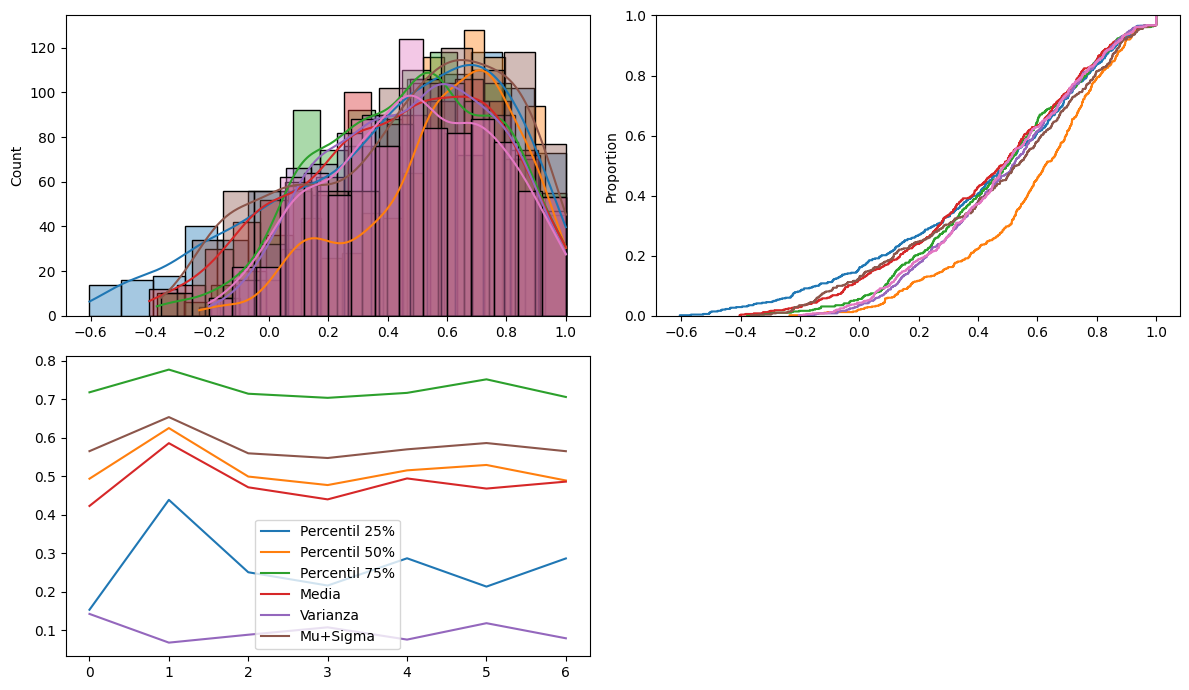

In [212]:
# Inicializar listas para estadísticas
th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

# Crear figura y ejes
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

# Lista de matrices PRE
ensayos_dfs = matrices_pre

# Dibujar todos los sujetos en la misma gráfica
for i, sujeto in enumerate(ensayos_dfs, 1):
    data = sujeto.stack().values
    
    # Cálculos estadísticos
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    
    # Plot de histogramas y ECDF (todos sobre la misma gráfica)
    sns.histplot(data, ax=axes[0][0], kde=True, label=f"Sujeto {i}", alpha=0.4)
    sns.ecdfplot(data, ax=axes[0][1], label=f"Sujeto {i}")

# Estadísticas resumen
axes[1][0].plot(th25, label="Percentil 25%")
axes[1][0].plot(th50, label="Percentil 50%")
axes[1][0].plot(th75, label="Percentil 75%")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].plot(mu_sigma, label="Mu+Sigma")
axes[1][0].legend()
axes[1][0].set_title("")

# Último subplot vacío
axes[1][1].axis("off")

# Ajuste de layout y mostrar figura
fig.tight_layout()
plt.show()

In [216]:
estadisticos_pre = pd.DataFrame(
    columns=["th25", "th50", "th75", "promedio", "varianza"], 
    index=["min", "max", "media", "percentil30"]
)

columnas = [th25, th50, th75, promedio, varianza]

estadisticos_pre.loc["min"] = [min(col) for col in columnas]
estadisticos_pre.loc["max"] = [max(col) for col in columnas]
estadisticos_pre.loc["media"] = [np.mean(col) for col in columnas]
estadisticos_pre.loc["percentil30"] = [np.percentile(col, 30) for col in columnas]

estadisticos_pre

,th25,th50,th75,promedio,varianza
min,0.15325,0.47747,0.704212,0.423127,0.067804
max,0.438949,0.625604,0.777651,0.586362,0.142455
media,0.263766,0.518762,0.727311,0.481527,0.097044
percentil30,0.215682,0.493032,0.713189,0.462706,0.078408


In [ ]:
## Filtrado de conexiones débiles:
# enfocarse en las interacciones más significativas


In [ ]:
## MATRIZ BINARIZADA

In [ ]:


hubB = betwenness_B[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_B, hubB,coords_df, axes[0])
grafo3D(coords_df, hubB, axes[1])
ensayo_grafo = grafo2D(PresultadosAP2, axes[2])

In [ ]:

# Grafo de resultados ACTIVO PRE 
hubA = betwenness_A[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_A, hubA,coords_df, axes[0])
grafo3D(coords_df, hubA, axes[1])
ensayo_grafo = grafo2D(resultadosAP2, axes[2])